Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/200
47/47 - 0s - loss: 203688.4062
Epoch 2/200
47/47 - 0s - loss: 175611.0312
Epoch 3/200
47/47 - 0s - loss: 153558.0156
Epoch 4/200
47/47 - 0s - loss: 135281.1094
Epoch 5/200
47/47 - 0s - loss: 120602.8516
Epoch 6/200
47/47 - 0s - loss: 108378.1094
Epoch 7/200
47/47 - 0s - loss: 98222.0859
Epoch 8/200
47/47 - 0s - loss: 89603.7109
Epoch 9/200
47/47 - 0s - loss: 82238.7734
Epoch 10/200
47/47 - 0s - loss: 76275.5703
Epoch 11/200
47/47 - 0s - loss: 72305.1172
Epoch 12/200
47/47 - 0s - loss: 68981.3359
Epoch 13/200
47/47 - 0s - loss: 66026.1562
Epoch 14/200
47/47 - 0s - loss: 63409.6484
Epoch 15/200
47/47 - 0s - loss: 61126.3945
Epoch 16/200
47/47 - 0s - loss: 59045.8789
Epoch 17/200
47/47 - 0s - loss: 57190.6953
Epoch 18/200
47/47 - 0s - loss: 55482.1289
Epoch 19/200
47/47 - 0s - loss: 53908.7930
Epoch 20/200
47/47 - 0s - loss: 52388.3711
Epoch 21/200
4

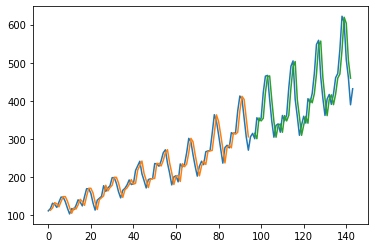

In [1]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from google.colab import drive

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# load the dataset
drive.mount('/content/drive')
#/content/drive/MyDrive//Colab Notebooks/dataset/InternationalAirlinePassengers.csv /content/drive/MyDrive//Colab Notebooks/dataset/Housing.csv
dataframe = read_csv("/content/drive/MyDrive//Colab Notebooks/dataset/international-airline-passengers.csv", usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()